# Practical 1
# From linear to non-linear models with Tensorflow and MNIST

### Introduction

In this practical, we will build a linear and non-linear classification model using Tensorflow and the MNIST dataset. MNIST consists of 60 000 grayscale training images of handwritten digits (i.e., 0, 1, 2, ..., 9). The test set consists of 10 000 images that we want to classify correctly with our model. More detail on the dataset can be viewed [here](https://en.wikipedia.org/wiki/MNIST_database).

### Learning objectives
* Implement a linear classifier using the Tensorflow math libraries and the MNIST image dataset.
* Implement a non-linear classifier by adding one hidden layer with non-linear activation units. 
* Understand basic Tensorflow objects, operations and graphs.
* Understand *cross entropy loss*, *activation units*, the *softmax* layer, and basic knowledge of *gradient descent* optimisation.
* Understand the hyperparameters associated with a linear and simple non-linear network.
-------------------------------------------------------------------------------------------------------------------------
### What is expected of you?

#### Part I (linear model):
1. Step through the initial code and make sure the MNIST data downloaded successfully. Make sure you understand why the categorical output variable (the label) is *one-hot encoded*.
2. Use Tensorflow placeholders, variables and arithmetic operators to create a graph for a linear classifier. Make sure all tensor dimensions are configured correctly. 
3. Create a loss function using the `softmax_cross_entropy_with_logits_v2` function in Tensorflow. Make sure you understand what this function is doing (more on this [here](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2)). Note that we could have written the full equation for the loss function, however the built-in Tensorflow function is numerically more stable (more on this [here](https://en.wikipedia.org/wiki/Cross_entropy)).
4. Use the `GradientDescentOptimizer` optimiser in Tensorflow to minimise the cross entropy loss. Make sure you understand what this function is doing (more on this [here](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)).
5. Create an appropriate evaluation metric that will help you determine the accuracy of your classifier.
6. Create a training loop that cycles through random batches of the training data. We also want to be able to cycle through the entire dataset a number of times (more on this [here](https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks)).
7. Document all the hyperparameter values in your experiment and plot the **training set** cross entropy loss and **performance** (based on the evaluation metric you selected) of the linear model.
8. Tweak the batch size and learning rate and document your observations.

#### Part II (non-linear model):
1. Modify the graph to make the classifier non-linear by adding a hidden layer (of size 100 nodes) with non-linear activations. Use *rectified linear units* to introduce the pointwise nonlinearity (more on this [here](https://www.tensorflow.org/api_docs/python/tf/nn/relu)). 
2. Document all the hyperparameters in your experiment, and the model performance.
3. Tweak the hyperparameters and document your observations.
4. Why do you think this exercise is useful to understand in the context of smart grid technology?

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


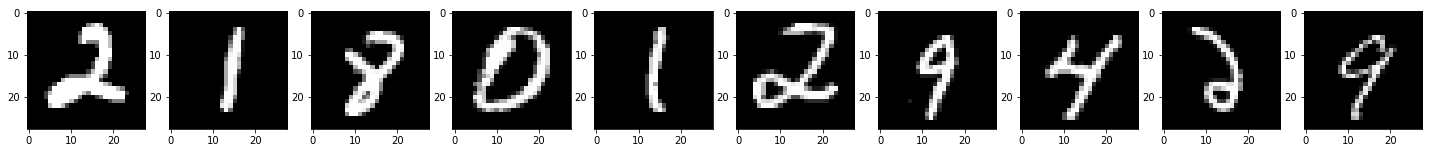

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# this function is for visualising the MNIST data #
def display_mnist_images(gens, num_images):
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'
    fig, axs = plt.subplots(1, num_images, figsize=(25, 3))
    for i in range(num_images):
        reshaped_img = (gens[i].reshape(28, 28) * 255).astype(np.uint8)
        axs.flat[i].imshow(reshaped_img)
    plt.show()

# download MNIST dataset #
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# visualize random sample of MNIST images #
batch_xs, batch_ys = mnist.train.next_batch(10)
list_of_images = np.split(batch_xs, 10)
display_mnist_images(list_of_images, 10)

In [1]:
x_dim, train_examples, n_classes = mnist.train.images.shape[1], mnist.train.num_examples, mnist.train.labels.shape[1]

######################################
# define the model (build the graph) #
######################################

x = 
W = 
b = 
y = 
y_ = 

########################
# define loss function #
########################

cross_entropy_loss = 

learning_rate = 

train_step = 

###########################
# define model evaluation #
###########################

classification_accuracy = 

#########################
# define training cycle #
#########################

num_epochs = 50
batch_size = 20

# initializing the variables before starting the session #
init = tf.global_variables_initializer()

# launch the graph in a session (use the session as a context manager) #
with tf.Session() as sess:
    # run session #
    sess.run(init)
    # start main training cycle #
    for epoch in range(num_epochs):
        avg_cost = 0.
        avg_acc = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # loop over all batches #
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # run optimization op (backprop), cost op and accuracy op (to get training losses) #
            _, c, a = sess.run([train_step, cross_entropy_loss, classification_accuracy], feed_dict={x: batch_x, y: batch_y})
            # compute avg training loss and avg training accuracy #
            avg_cost += c / total_batch
            avg_acc += a / total_batch
        # display logs per epoch step #
        if epoch % 1 == 0:
            print("Epoch {}: cross-entropy-loss = {:.4f}, training-accuracy = {:.3f}%".format(epoch + 1, avg_cost, avg_acc * 100))
    print("Optimization Finished!")
    # calculate test set accuracy #
    test_accuracy = classification_accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
    print("Accuracy on test set = {:.3f}%".format(test_accuracy * 100))